In [1]:
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import empyrical as epc
import seaborn as sns

pd.set_option("display.max_rows", 1000)
pd.set_option('mode.chained_assignment', None)

## data input

In [2]:
##2017-2021 HS300 stocks

# daily
Data = pd.read_csv(r'C:\Users\13062\Desktop\d\daily_hs300.csv')
# moneyflow
Data_money = pd.read_csv(r'C:\Users\13062\Desktop\d\daily_hs300_moneyflow.csv')
# basic
Data_basic = pd.read_csv(r'C:\Users\13062\Desktop\d\daily_hs300_basic.csv')
# industry
Industry = pd.read_csv(r'C:\Users\13062\Desktop\d\allst_basic_data.csv')

In [3]:
Industry_dict = dict(zip(Industry['ts_code'],Industry['industry']))
def indus(x):
    if x in Industry_dict.keys():
        return Industry_dict[x]
    else:
        return 'NOCAT'

Data['industry'] = Data['ts_code'].apply(lambda x: indus(x) )

In [4]:
Data.set_index(['trade_date','ts_code'],inplace = True)
Data_money.set_index(['trade_date','ts_code'],inplace = True)
Data_basic.set_index(['trade_date','ts_code'],inplace = True)

In [5]:
data = pd.concat([Data,Data_money],axis = 1)
data = pd.concat([data,Data_basic],axis = 1)
data.reset_index(inplace = True)

In [6]:
data

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,...,net_mf_amount,pe,pb,ps,dv_ratio,total_share,float_share,free_share,total_mv,circ_mv
0,20170103,000001.SZ,9.11,9.18,9.09,9.16,9.10,0.06,0.6600,459840.49,...,6531.67,7.1933,0.8822,1.6356,1.3900,1.717041e+06,1.463118e+06,761028.1784,1.572810e+07,1.340216e+07
1,20170103,000002.SZ,20.55,20.88,20.55,20.73,20.55,0.18,0.8800,217016.69,...,1882.25,12.6296,2.2792,1.1703,3.4732,1.103915e+06,9.708108e+05,709927.8040,2.288416e+07,2.012491e+07
2,20170103,000008.SZ,9.33,9.37,9.29,9.34,9.32,0.02,0.2100,47814.12,...,-745.18,141.3076,4.3392,20.2589,NaN,2.809078e+05,1.495229e+05,93132.6488,2.623679e+06,1.396543e+06
3,20170103,000009.SZ,10.39,10.53,10.37,10.46,10.36,0.10,0.9700,263917.73,...,-84.47,28.4941,4.9545,4.6209,0.4957,2.149345e+05,2.120066e+05,174426.4255,2.248215e+06,2.217589e+06
4,20170103,000027.SZ,6.88,6.94,6.88,6.92,6.87,0.05,0.7300,70835.84,...,-546.03,15.3231,1.2811,2.4649,2.8902,3.964492e+05,3.964492e+05,106611.9179,2.743428e+06,2.743428e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438859,20210201,603993.SH,6.01,6.10,5.85,5.96,6.06,-0.10,-1.6502,2767916.85,...,-23201.81,69.3217,3.1887,1.8745,0.7215,2.159924e+06,1.766577e+06,700277.2183,1.287315e+07,1.052880e+07
438860,20210201,688008.SH,87.59,88.38,83.50,87.88,87.51,0.37,0.4228,64428.44,...,-3612.55,106.4342,12.4996,57.1365,NaN,1.129814e+05,4.202018e+04,42020.1823,9.928804e+06,3.692734e+06
438861,20210201,688009.SH,5.75,5.80,5.72,5.78,5.76,0.02,0.3472,141716.27,...,437.23,16.0407,1.5818,1.4697,NaN,1.058982e+06,1.980592e+05,198059.1576,6.120915e+06,1.144782e+06
438862,20210201,688012.SH,152.00,160.50,152.00,157.04,153.55,3.49,2.2729,36087.09,...,3438.03,445.4438,20.4839,43.1417,NaN,5.348622e+04,2.454025e+04,24540.2535,8.399477e+06,3.853801e+06


In [7]:
data.columns

Index(['trade_date', 'ts_code', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount', 'turnover_rate', 'volume_ratio',
       'ma5', 'ma_v_5', 'ma20', 'ma_v_20', 'ma50', 'ma_v_50', 'industry',
       'buy_sm_vol', 'buy_sm_amount', 'sell_sm_vol', 'sell_sm_amount',
       'buy_md_vol', 'buy_md_amount', 'sell_md_vol', 'sell_md_amount',
       'buy_lg_vol', 'buy_lg_amount', 'sell_lg_vol', 'sell_lg_amount',
       'buy_elg_vol', 'buy_elg_amount', 'sell_elg_vol', 'sell_elg_amount',
       'net_mf_vol', 'net_mf_amount', 'pe', 'pb', 'ps', 'dv_ratio',
       'total_share', 'float_share', 'free_share', 'total_mv', 'circ_mv'],
      dtype='object')

In [8]:
data.sort_values(['ts_code','trade_date'],inplace = True)

## Factor calculation

In [9]:
## return
data['Return'] = data.groupby('ts_code')['close'].apply(lambda x: (x - x.shift(1))/x.shift(1))
data['Return_std'] = data['Return'].rolling(5).std()


In [10]:
## change rate of holdings
data['trchange'] = data.groupby('ts_code')['turnover_rate'].apply(lambda x: (x - x.shift(1))/x.shift(1))

In [11]:
## overnight profit rate
data['over_night'] = (data['open'] - data['pre_close'])/data['pre_close']

In [12]:
## close over 5day average
data['MA5_per'] = (data['close'] - data['ma5']) / data['ma5']
data['VMA5_per'] = (data['vol'] - data['ma_v_5']) / data['ma_v_5']

In [13]:
## close over 20days' average
data['MA20_per'] = (data['close'] - data['ma20']) / data['ma20']
data['VMA20_per'] = (data['vol'] - data['ma_v_20']) / data['ma_v_20']

In [14]:
## close over 50 days' average
data['MA50_per'] = (data['close'] - data['ma50']) / data['ma50']
data['VMA50_per'] = (data['vol'] - data['ma_v_50']) / data['ma_v_50']

In [15]:
## MACD
data['EMA_12'] = data.groupby('ts_code')['close'].apply(lambda x :x.ewm(span = 12,adjust=False).mean())
data['EMA_26'] = data.groupby('ts_code')['close'].apply(lambda x :x.ewm(span = 26,adjust=False).mean())
data['DIF'] = data['EMA_12'] - data['EMA_26']
data['DEA'] = data.groupby('ts_code')['DIF'].apply(lambda x :x.ewm(span = 9,adjust = False).mean())
data['MCAD_new'] = np.sign(data['DIF']*data['DEA'])*(data['DIF'] - data['DEA'])

In [16]:
## VOSC
data['VOSC'] = (data['ma_v_5'] - data['ma_v_20'])/ data['ma_v_20']

In [17]:
## up low change
data['high_change'] = data.groupby('ts_code')['high'].apply(lambda x: (x - x.shift(1))/x.shift(1))
data['low_change'] = data.groupby('ts_code')['low'].apply(lambda x: (x - x.shift(1))/x.shift(1))
data['uplow_change'] = data['high_change'] - data['low_change']

In [18]:
##huge buy
data['buy_elg_vol_5ma'] = data.groupby('ts_code')['buy_elg_vol'].apply(lambda x : x.rolling(5).mean())
data['buy_elg_vol_5per'] = (data['buy_elg_vol'] - data['buy_elg_vol_5ma']) / data['buy_elg_vol_5ma']
data['buy_elg_vol_5per'] = data.groupby('industry')['buy_elg_vol_5per'].apply(lambda x: x - np.mean(x))

In [19]:
## huge sell
data['sell_elg_vol_5ma'] = data.groupby('ts_code')['sell_elg_vol'].apply(lambda x : x.rolling(5).mean())
data['sell_elg_vol_5per'] = (data['sell_elg_vol'] - data['sell_elg_vol_5ma']) / data['sell_elg_vol_5ma']
data['sell_elg_vol_5per'] = data.groupby('industry')['sell_elg_vol_5per'].apply(lambda x: x - np.mean(x))

In [20]:
#difference
data['diff_sell_elg_vol_5per'] = data['buy_elg_vol_5per'] - data['sell_elg_vol_5per']

In [21]:
## net flow change
data['net_mf_vol_chg'] = data.groupby('ts_code')['net_mf_vol'].apply(lambda x: (x - x.shift(1))/x.shift(1))

In [22]:
## value
data['mktc_inv'] = 1 / data['circ_mv'] * 10**7

In [23]:
data

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,...,high_change,low_change,uplow_change,buy_elg_vol_5ma,buy_elg_vol_5per,sell_elg_vol_5ma,sell_elg_vol_5per,diff_sell_elg_vol_5per,net_mf_vol_chg,mktc_inv
0,20170103,000001.SZ,9.11,9.18,9.09,9.16,9.10,0.06,0.6600,459840.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746148
409,20170104,000001.SZ,9.15,9.18,9.14,9.16,9.16,0.00,0.0000,449329.53,...,0.000000,0.005501,-0.005501,NaN,NaN,NaN,NaN,NaN,-1.096482,0.746148
818,20170105,000001.SZ,9.17,9.18,9.15,9.17,9.16,0.01,0.1100,344372.91,...,0.000000,0.001094,-0.001094,NaN,NaN,NaN,NaN,NaN,-3.516705,0.745335
1225,20170106,000001.SZ,9.17,9.17,9.11,9.13,9.17,-0.04,-0.4400,358154.20,...,-0.001089,-0.004372,0.003282,NaN,NaN,NaN,NaN,NaN,-8.909091,0.748600
1631,20170109,000001.SZ,9.13,9.17,9.11,9.15,9.13,0.02,0.2200,361081.57,...,0.000000,0.000000,0.000000,97452.2,0.187703,109288.4,-0.128633,0.316336,-0.721204,0.645996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436986,20210126,688036.SH,204.59,204.59,192.06,197.00,207.51,-10.51,-5.0648,32494.23,...,-0.034907,0.027059,-0.061966,5821.0,-0.605568,5600.0,-0.119596,-0.485972,-0.991916,1.304335
437455,20210127,688036.SH,197.01,199.50,183.88,190.00,197.00,-7.00,-3.5533,32477.26,...,-0.024879,-0.042591,0.017712,4677.0,-0.277441,5389.8,-0.141115,-0.136327,-69.029412,1.352389
437925,20210128,688036.SH,186.81,195.58,183.00,185.20,190.00,-4.80,-2.5263,26012.65,...,-0.019649,-0.004786,-0.014863,3630.0,-0.552358,4517.0,-0.318466,-0.233892,0.328578,1.387441
438394,20210129,688036.SH,186.97,208.80,182.00,206.00,185.20,20.80,11.2311,46802.47,...,0.067594,-0.005464,0.073058,3867.6,0.473983,5149.6,0.290507,0.183476,-5.268793,1.247349


In [24]:
## Y：prediction：open high and low
data['Y'] = data.groupby('ts_code')['open'].apply(lambda x: (x - x.shift(1))/x.shift(1))
print(data)
data['Y'] = data.groupby('ts_code')['Y'].apply(lambda x:x.shift(-2))

        trade_date    ts_code    open    high     low   close  pre_close  \
0         20170103  000001.SZ    9.11    9.18    9.09    9.16       9.10   
409       20170104  000001.SZ    9.15    9.18    9.14    9.16       9.16   
818       20170105  000001.SZ    9.17    9.18    9.15    9.17       9.16   
1225      20170106  000001.SZ    9.17    9.17    9.11    9.13       9.17   
1631      20170109  000001.SZ    9.13    9.17    9.11    9.15       9.13   
...            ...        ...     ...     ...     ...     ...        ...   
436986    20210126  688036.SH  204.59  204.59  192.06  197.00     207.51   
437455    20210127  688036.SH  197.01  199.50  183.88  190.00     197.00   
437925    20210128  688036.SH  186.81  195.58  183.00  185.20     190.00   
438394    20210129  688036.SH  186.97  208.80  182.00  206.00     185.20   
438863    20210201  688036.SH  200.00  200.00  180.01  187.14     206.00   

        change  pct_chg        vol  ...  low_change  uplow_change  \
0         0.06   0

In [25]:
# dispose NAN
data.dropna(subset = ['Y'],inplace = True)
data

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,...,low_change,uplow_change,buy_elg_vol_5ma,buy_elg_vol_5per,sell_elg_vol_5ma,sell_elg_vol_5per,diff_sell_elg_vol_5per,net_mf_vol_chg,mktc_inv,Y
0,20170103,000001.SZ,9.11,9.18,9.09,9.16,9.10,0.06,0.6600,459840.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746148,0.002186
409,20170104,000001.SZ,9.15,9.18,9.14,9.16,9.16,0.00,0.0000,449329.53,...,0.005501,-0.005501,NaN,NaN,NaN,NaN,NaN,-1.096482,0.746148,0.000000
818,20170105,000001.SZ,9.17,9.18,9.15,9.17,9.16,0.01,0.1100,344372.91,...,0.001094,-0.001094,NaN,NaN,NaN,NaN,NaN,-3.516705,0.745335,-0.004362
1225,20170106,000001.SZ,9.17,9.17,9.11,9.13,9.17,-0.04,-0.4400,358154.20,...,-0.004372,0.003282,NaN,NaN,NaN,NaN,NaN,-8.909091,0.748600,0.002191
1631,20170109,000001.SZ,9.13,9.17,9.11,9.15,9.13,0.02,0.2200,361081.57,...,0.000000,0.000000,97452.2,0.187703,109288.4,-0.128633,0.316336,-0.721204,0.645996,-0.001093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436048,20210122,688036.SH,191.01,196.17,182.00,191.00,192.06,-1.06,-0.5519,36313.41,...,0.067449,-0.061397,5188.4,-0.132536,4938.4,-0.294191,0.161655,-1.392717,1.345309,0.071152
436517,20210125,688036.SH,191.00,211.99,187.00,207.51,191.00,16.51,8.6440,39551.87,...,0.027473,0.053172,5688.0,0.076160,5646.0,0.079457,-0.003297,-3.805871,1.238273,-0.037050
436986,20210126,688036.SH,204.59,204.59,192.06,197.00,207.51,-10.51,-5.0648,32494.23,...,0.027059,-0.061966,5821.0,-0.605568,5600.0,-0.119596,-0.485972,-0.991916,1.304335,-0.051774
437455,20210127,688036.SH,197.01,199.50,183.88,190.00,197.00,-7.00,-3.5533,32477.26,...,-0.042591,0.017712,4677.0,-0.277441,5389.8,-0.141115,-0.136327,-69.029412,1.352389,0.000856


In [26]:
## generate the matrix
FACTOR = data[['trade_date','ts_code','close','open','vol','volume_ratio','trchange','over_night','MA5_per','MA20_per',
               'VMA5_per','VMA50_per','MA50_per','MCAD_new','VOSC','uplow_change','pct_chg','Return_std','high_change',
               'diff_sell_elg_vol_5per','net_mf_vol_chg','mktc_inv','pe','pb','ps','dv_ratio','Y']]

FACTOR['year'] = FACTOR['trade_date'].apply(lambda x : int(str(x)[:4]))
FACTOR['month'] = FACTOR['trade_date'].apply(lambda x : int(str(x)[4:6]))
FACTOR['trade_date'] = FACTOR['trade_date'].apply(lambda x : datetime.datetime.strptime(str(x),"%Y%m%d").date())
FACTOR['weekday'] = FACTOR['trade_date'].apply(lambda x :  datetime.date.weekday(x))
#FACTOR['code'] = FACTOR['ts_code'].apply(lambda x : int(x[:-3]) )

In [27]:
FACTOR

,trade_date,ts_code,close,open,vol,volume_ratio,trchange,over_night,MA5_per,MA20_per,...,net_mf_vol_chg,mktc_inv,pe,pb,ps,dv_ratio,Y,year,month,weekday
0,2017-01-03,000001.SZ,9.16,9.11,459840.49,1.48,NaN,0.001099,NaN,NaN,...,NaN,0.746148,7.1933,0.8822,1.6356,1.39,0.002186,2017,1,1
409,2017-01-04,000001.SZ,9.16,9.15,449329.53,1.32,-0.022908,-0.001092,NaN,NaN,...,-1.096482,0.746148,7.1933,0.8822,1.6356,1.39,0.000000,2017,1,2
818,2017-01-05,000001.SZ,9.17,9.17,344372.91,0.91,-0.233474,0.001092,NaN,NaN,...,-3.516705,0.745335,7.2011,0.8832,1.6374,1.39,-0.004362,2017,1,3
1225,2017-01-06,000001.SZ,9.13,9.17,358154.20,0.95,0.039932,0.000000,NaN,NaN,...,-8.909091,0.748600,7.1697,0.8793,1.6302,1.40,0.002191,2017,1,4
1631,2017-01-09,000001.SZ,9.15,9.13,361081.57,0.94,-0.128268,0.000000,-0.000437,NaN,...,-0.721204,0.645996,7.1854,0.8813,1.6338,1.39,-0.001093,2017,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436048,2021-01-22,688036.SH,191.00,191.01,36313.41,0.94,-0.239961,-0.005467,0.085326,0.214939,...,-1.392717,1.345309,85.2059,15.7122,6.0286,NaN,0.071152,2021,1,4
436517,2021-01-25,688036.SH,207.51,191.00,39551.87,1.02,0.089165,0.000000,0.124484,0.291405,...,-3.805871,1.238273,92.5711,17.0703,6.5497,NaN,-0.037050,2021,1,0
436986,2021-01-26,688036.SH,197.00,204.59,32494.23,0.81,-0.178392,-0.014072,0.021180,0.204668,...,-0.991916,1.304335,87.8825,16.2057,6.2180,NaN,-0.051774,2021,1,1
437455,2021-01-27,688036.SH,190.00,197.01,32477.26,0.80,-0.000599,0.000051,-0.028203,0.145023,...,-69.029412,1.352389,84.7598,15.6299,5.9970,NaN,0.000856,2021,1,2


In [28]:
## 
FACTOR.fillna(method = 'ffill',inplace = True)
FACTOR.replace(np.inf,np.nan,inplace = True)
FACTOR.replace(-np.inf,np.nan,inplace = True) 
FACTOR.dropna(axis = 0,inplace= True)
FACTOR.set_index(['trade_date','ts_code'],inplace = True)

In [29]:
FACTOR_1 = FACTOR.loc[:,~(FACTOR.columns == 'Y')]
Y_or = FACTOR.loc[:,'Y']

In [30]:
Y_or

trade_date  ts_code  
2017-03-20  000001.SZ   -0.005405
2017-03-21  000001.SZ   -0.004348
2017-03-22  000001.SZ    0.004367
2017-03-23  000001.SZ   -0.008696
2017-03-24  000001.SZ    0.004386
                           ...   
2021-01-22  688036.SH    0.071152
2021-01-25  688036.SH   -0.037050
2021-01-26  688036.SH   -0.051774
2021-01-27  688036.SH    0.000856
2021-01-28  688036.SH    0.069690
Name: Y, Length: 437850, dtype: float64

In [31]:
Y = (Y_or>0).map(int)
Y

trade_date  ts_code  
2017-03-20  000001.SZ    0
2017-03-21  000001.SZ    0
2017-03-22  000001.SZ    1
2017-03-23  000001.SZ    0
2017-03-24  000001.SZ    1
                        ..
2021-01-22  688036.SH    1
2021-01-25  688036.SH    0
2021-01-26  688036.SH    0
2021-01-27  688036.SH    1
2021-01-28  688036.SH    1
Name: Y, Length: 437850, dtype: int64

## factor selection

<AxesSubplot:>

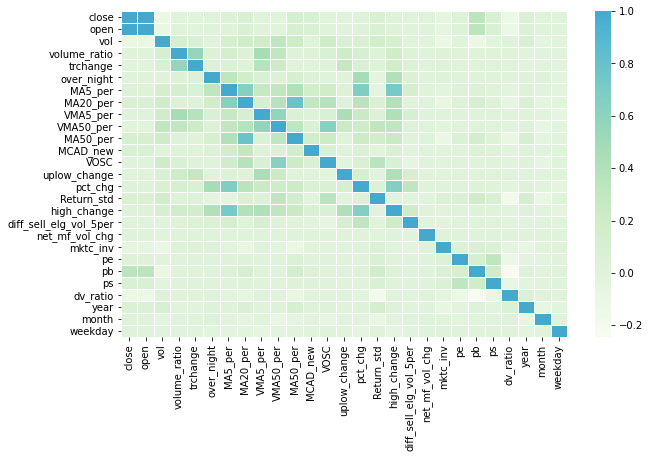

In [32]:
## relevance selection
figure = plt.figure(figsize = (10,6))
sns.heatmap(FACTOR_1.corr(),cmap = 'GnBu',linewidths = 0.5,center = 0.7)

<AxesSubplot:>

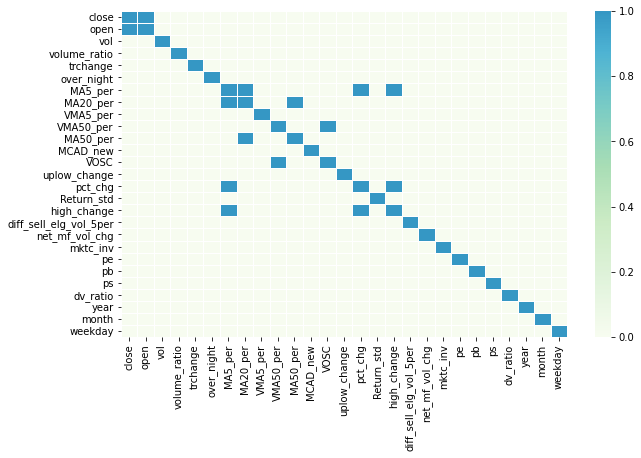

In [33]:
figure = plt.figure(figsize = (10,6))
sns.heatmap(FACTOR_1.corr() > 0.6,cmap = 'GnBu',linewidths = 0.5,center = 0.7)

In [34]:
X = FACTOR_1.copy()
#ts_code = X['ts_code']
X.drop(['close','MA20_per','MA50_per','pct_chg','high_change','VOSC','year','dv_ratio'],axis = 1 ,inplace= True)
X
#X = np.array(X)

,,open,vol,volume_ratio,trchange,over_night,MA5_per,VMA5_per,VMA50_per,MCAD_new,uplow_change,Return_std,diff_sell_elg_vol_5per,net_mf_vol_chg,mktc_inv,pe,pb,ps,month,weekday
trade_date,ts_code,,,,,,,,,,,,,,,,,,,
2017-03-20,000001.SZ,9.29,715021.77,0.96,-0.548553,-0.002148,-0.015957,-0.079924,0.532671,-0.024184,-0.007254,0.010994,0.291413,-0.698966,0.639013,7.0280,0.8716,1.4745,3,0
2017-03-21,000001.SZ,9.25,554648.74,0.71,-0.224326,0.000000,-0.012821,-0.312845,0.184093,0.029835,-0.003201,0.010906,-0.007562,-0.622214,0.639704,7.0204,0.8707,1.4729,3,1
2017-03-22,000001.SZ,9.20,566123.63,0.70,0.020744,-0.004329,-0.014630,-0.302012,0.202594,0.037089,0.002202,0.009881,-0.126403,1.946550,0.645291,6.9596,0.8631,1.4602,3,2
2017-03-23,000001.SZ,9.16,433588.29,0.53,-0.234011,0.000000,-0.003466,-0.437341,-0.082424,0.037224,0.001075,0.009922,0.218248,-1.220456,0.642486,6.9900,0.8669,1.4665,3,3
2017-03-24,000001.SZ,9.20,710827.87,0.92,0.639485,0.000000,-0.001955,0.192580,0.482157,-0.035996,-0.001093,0.005114,-0.299562,-5.283444,0.643185,6.9824,0.8660,1.4649,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-22,688036.SH,191.01,36313.41,0.94,-0.239961,-0.005467,0.085326,-0.067452,-0.104003,3.682787,-0.061397,0.078417,0.161655,-1.392717,1.345309,85.2059,15.7122,6.0286,1,4
2021-01-25,688036.SH,191.00,39551.87,1.02,0.089165,0.000000,0.124484,-0.019248,-0.021101,4.872000,0.053172,0.080126,-0.003297,-3.805871,1.238273,92.5711,17.0703,6.5497,1,0
2021-01-26,688036.SH,204.59,32494.23,0.81,-0.178392,-0.014072,0.021180,-0.201959,-0.184079,4.614307,-0.061966,0.077546,-0.485972,-0.991916,1.304335,87.8825,16.2057,6.2180,1,1


<AxesSubplot:>

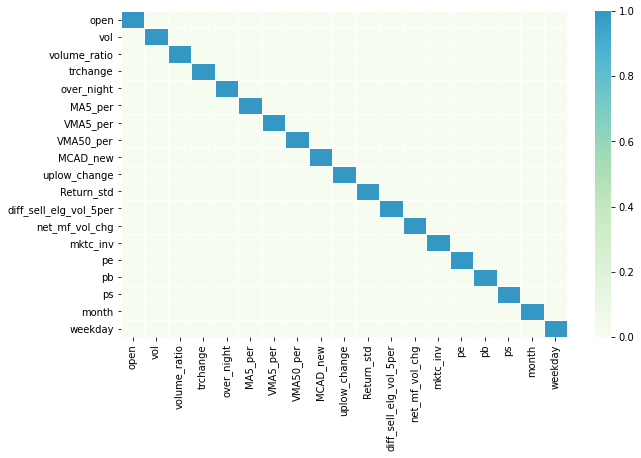

In [35]:
figure = plt.figure(figsize = (10,6))
sns.heatmap(X.corr() > 0.6,cmap = 'GnBu',linewidths = 0.5,center = 0.7)

## XGBOOST 


The 2class-classification algorithm predicts the rise and fall of open on T + 2 trading day relative to open on T + 1 trading day. 1 is up and 0 is down.

In [36]:
lim = datetime.datetime.strptime('20200501','%Y%m%d')

X_train = X[X.index.get_level_values(0)<lim ]
X_test = X[X.index.get_level_values(0)>=lim ]

y_train = Y[Y.index.get_level_values(0)<lim ]
y_test = Y[Y.index.get_level_values(0)>=lim ]

In [37]:
y_train

trade_date  ts_code  
2017-03-20  000001.SZ    0
2017-03-21  000001.SZ    0
2017-03-22  000001.SZ    1
2017-03-23  000001.SZ    0
2017-03-24  000001.SZ    1
                        ..
2020-04-24  688036.SH    0
2020-04-27  688036.SH    0
2020-04-28  688036.SH    1
2020-04-29  688036.SH    1
2020-04-30  688036.SH    1
Name: Y, Length: 352046, dtype: int64

In [38]:
import xgboost as xgb

In [39]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 110
params = {
'booster': 'gbtree',
'objective': 'binary:hinge',
#'num_class': 2,
'gamma': 0,
'max_depth': 9,
'reg_alpha':0.1,
'lambda': 1,
'subsample': 0.7,
'colsample_bytree': 0.8,
'min_child_weight': 6,
'verbosity':0,
'eta': 0.1,
'seed': 5,
#'nthread': 60,
}
plst = list(params.items())
model = xgb.train(plst, dtrain, num_rounds)
# test
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)



In [40]:
def score(y_test, y_pred):
    y_test_v = y_test.values
    return sum((y_test_v == y_pred)) / len(y_pred)

0.5410936553074449


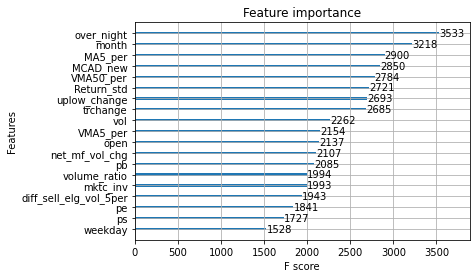

In [41]:
print(score(y_test,y_pred))
xgb.plot_importance(model)
plt.show()

In [42]:
y_pred

array([0., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [43]:
np.sum(( y_test == 1))/len(y_pred) 

0.46694792783553213

In [44]:
np.sum((y_pred - y_test) == 1)/len(y_pred) # 假阳

0.18776513915435178

In [45]:
np.sum((y_pred - y_test) == -1)/len(y_pred) # 假阴

0.27114120553820337

In [46]:
np.sum(((y_pred - y_test) == 0)&(y_pred ==1))/len(y_pred) # 真阳

0.1958067222973288

In [47]:
np.sum(((y_pred - y_test) == 0)&(y_pred ==0))/len(y_pred) # 真阴

0.3452869330101161

#### 参数寻优

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#max_depth = [8,9,10,12,13]
eta = [0.01,0.05,0.1]
min_child_weight = [3,4,5,6]
#subsample = [0.7,0.8,0.9,1]
#colsample_bytree = [0.7,0.8,0.9,1]
reg_alpha = [0.01,0.1,0.5,1]


param_grid = dict(reg_alpha =reg_alpha)

params1 = {
'booster': 'gbtree',
'objective': 'binary:hinge',
'n_estimators':110,
'gamma': 0,
'max_depth': 9,
'reg_alpha':1,
'lambda': 1,
'subsample': 0.9,
'colsample_bytree': 1,
'min_child_weight': 6 ,
'verbosity':0,
'eta': 0.1,
'seed': 5,
#'nthread': 60,
}

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
model = xgb.XGBClassifier(**params1)

grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Fitting 3 folds for each of 4 candidates, totalling 12 fits


D:\Anaconda\envs\pytorch\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best: 0.591809 using {'reg_alpha': 0.1}


## 回测

In [67]:
#### backtest v2 ####
# considering tax
# benchmark：HS300指数


def backtest(signal_df):
   
    
    sig = signal_df.copy()
    date_list = sorted(list(set(sig.index.to_list())))
    
    result = pd.DataFrame(index = date_list,columns = ['cash','capital','turn_over','hold'])
    sig['open'] = sig[['open','ts_code']].groupby('ts_code').shift(-1) # next period 
    sig['compare'] = sig['compare']/sig['open']   # capital*weight/open = amount
     
    signal = sig.copy()
    signal = signal.replace(0,np.nan).dropna() # delete0
    
    fee = 1.0*10**-3 # tax1
    fee_twoside = 6.4*10**-4 # tax2
    
    hold = {}  # symbol: amount
    result.iloc[0,:] = [100000,100000,0,hold]
    
    for i in range(len(date_list)-1):
        
        day = date_list[i]
        trday_signal = signal[signal.index == day]
        
   
        today_sym = sig[sig.index == day]['ts_code'].to_list()
        today_open = sig[sig.index == day]['open'].to_list()
        today_inf = dict(zip(today_sym,today_open))    # open
        #print(today_inf)
       
        
        if trday_signal.empty :
            
            ## no signal
            result.cash.iloc[i+1] = result.cash.iloc[i]
            result.turn_over.iloc[i+1] = 0
            result.hold.iloc[i+1] = [hold]
            
                
            hold_amount = {k:v*hold[k] for k,v in today_inf.items() if k in hold.keys() } # update capital
            hold_cap = sum(hold_amount.values())
            result.capital.iloc[i+1] = hold_cap + result.cash.iloc[i+1]
            #print(date_list[i+1],'no signal')
            
        else:
            ##  trday_signal
            tar_hold = trday_signal['ts_code'].to_list()
             # 
            tar_open = [result.capital.iloc[i]*x for x in trday_signal['compare'].to_list()]  
            tar = dict(zip(tar_hold,tar_open))
           
            ## sell
            
            sell_inhold = {}
            curr_hold = hold.copy()
            for k,v in curr_hold.items():
                if k not in tar.keys():
                    sell_inhold[k] = v
                    del hold[k]
                else:
                     if v > tar[k]:
                        sell_inhold[k] = v - tar[k]
                        hold[k] = tar[k]
            
            
            sell_amount = {k:v*today_inf[k] for k,v in sell_inhold.items() if k in today_inf.keys()}
            sell_amount = {k: sell_amount[k] for k in sell_amount if not np.isnan(sell_amount[k])}
            
            if sell_amount:
                sell_cash = sum(sell_amount.values())  # cash
            else:
                sell_cash = 0 
                
            cash = result.cash.iloc[i] + sell_cash*(1-fee-fee_twoside) # holding cash  
           
            
            ## buy

            buy = {}
            curr_hold = hold.copy()
        
            for k,v in tar.items():
                if k not in curr_hold:
                    buy[k] = v
                    hold[k] = v  
                else:
                    if curr_hold[k] < tar[k]:
                        buy[k] = tar[k] - curr_hold[k]
                        hold[k] = tar[k]
                        
            
            buy_amount = {k:v*today_inf[k] for k,v in buy.items()}
            buy_amount = {k: buy_amount[k] for k in buy_amount if not np.isnan(buy_amount[k])}
            
         
            if  buy_amount:
                buy_cash = sum(buy_amount.values())
            else:
                buy_cash =0
            
            cash = cash - buy_cash * (1+fee_twoside)
                
            ## 
            hold = {k: hold[k] for k in hold if not np.isnan(hold[k])}
            
            result.cash.iloc[i+1] =  cash
            result.hold.iloc[i+1] = [hold]
            
            hold_amount = {k:v*hold[k] for k,v in today_inf.items() if k in hold.keys()} # 
            hold_amount = {k: hold_amount[k] for k in hold_amount if not np.isnan(hold_amount[k])}
            
            hold_cap = sum(hold_amount.values())
            result.capital.iloc[i+1] = hold_cap +  result.cash.iloc[i+1] 
            
            result.turn_over.iloc[i+1] = (sell_cash + buy_cash) / result.capital.iloc[i+1] # 
            #print(date_list[i+1],'FINISH')
            #print(result)
    
    ## 
    result['return'] = (result['capital'] - result['capital'].shift(1)) / result['capital'].shift(1)
    daily_return = result['return'].iloc[1:].astype(float)
    cum_return = list(epc.cum_returns(daily_return))   # total profit
    #print(daily_return)
    
    ## draw
    import tushare as ts
    pro = ts.pro_api('05f84cfdeb170115832506a3fe35195a3c63d6afe9d4d426532369cb')
    #ts.set_token('05f84cfdeb170115832506a3fe35195a3c63d6afe9d4d426532369cb')
    st_date = date_list[0].strftime('%Y%m%d')
    end_date = date_list[-1].strftime('%Y%m%d')
    
    df = pro.index_daily(ts_code='000300.SH', start_date=st_date, end_date=end_date)
    df.sort_values('trade_date',inplace = True)
    df['open_cumre'] = np.nancumprod(1+(df['open'] - df['open'].shift(1))/df['open'].shift(1))-1
    
    
    date_list = list(map(lambda x:x.date(),date_list))
    fig = plt.figure(figsize = (10,5))
    plt.rcParams['font.family'] = ['Arial Unicode MS']  #
    plt.rcParams['axes.unicode_minus']=False
    sns.set(font='Arial Unicode MS',font_scale = 1.2)
    plt.plot(cum_return,color = 'r',label = 'STRATEGY')
    plt.plot(df['open_cumre'].to_list(),color = 'b',label = 'HS300')
    plt.ylabel('total profit')
    
    label = [date_list[x*15] for x in range(len(date_list)//15)]
    plt.xticks([i*15 for i in range(len(label))],label,rotation = 30)
    plt.legend()
    ## 
    print('total profit(%):',cum_return[-1]*100)
    print('annual profit(%):',epc.annual_return(daily_return,period = 'daily')*100)  # 
    print('Maximum pullback:',epc.max_drawdown(daily_return))
    print('Sharp rate:',epc.sharpe_ratio(daily_return,period = 'daily'))
    #print('IR',epc.information_ratio(returns=returns, factor_returns=benchmark_returns))
    
    return result,cum_return

#### XGBOOST retro

In [68]:
y_re = pd.DataFrame(y_test)
y_re['compare'] = list(y_pred)
y_re['open'] = X_test['open']
y_re.reset_index(inplace = True)
#y_re.set_index('trade_date',inplace= True)

In [69]:
y_re['compare'] = y_re.groupby('trade_date')['compare'].apply(lambda x:x/np.sum(x))

In [70]:
y_re.set_index('trade_date',inplace= True)

In [71]:
y_re['open_Re_2'] = list(Y_or[Y_or.index.get_level_values(0)>=lim ])
y_re['Re'] = (y_re['Y'] * y_re['open_Re_2']).replace(0,np.nan)

In [72]:
daily_re = y_re.groupby('trade_date')['Re'].mean()

In [73]:
np.cumprod(1+daily_re)

trade_date
2020-05-06     1.014327
2020-05-07     1.031563
2020-05-08     1.045246
2020-05-11     1.063024
2020-05-12     1.078120
2020-05-13     1.093637
2020-05-14     1.112770
2020-05-15     1.132619
2020-05-18     1.153982
2020-05-19     1.171197
2020-05-20     1.191516
2020-05-21     1.206520
2020-05-22     1.225099
2020-05-25     1.244996
2020-05-26     1.265188
2020-05-27     1.279411
2020-05-28     1.311662
2020-05-29     1.345582
2020-06-01     1.366920
2020-06-02     1.390423
2020-06-03     1.414019
2020-06-04     1.439993
2020-06-05     1.463189
2020-06-08     1.484152
2020-06-09     1.511450
2020-06-10     1.545748
2020-06-11     1.581092
2020-06-12     1.609281
2020-06-15     1.634421
2020-06-16     1.662388
2020-06-17     1.689560
2020-06-18     1.722746
2020-06-19     1.752487
2020-06-22     1.787467
2020-06-23     1.819478
2020-06-24     1.851998
2020-06-29     1.888098
2020-06-30     1.931652
2020-07-01     2.008627
2020-07-02     2.091841
2020-07-03     2.218007
2020-

findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


累计收益率(%): 481.4054798806252
年化收益率(%): 1044.2200454510623
最大回撤: -0.04260358888209767
夏普率: 17.53684572702038


D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32047 missing from c

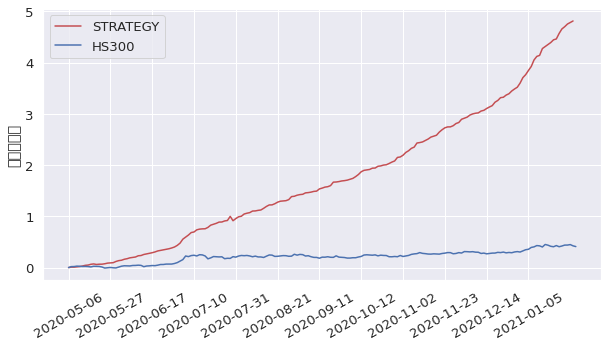

In [77]:
(result,cum_return) = backtest(y_re)

In [ ]:
np.mean(result.turn_over)

In [78]:
cum_return

[-0.00036765957446793784,
 0.007666902136665765,
 0.007960024503880225,
 0.014450293219943289,
 0.019430503483807815,
 0.03005211778685979,
 0.04314716319842127,
 0.04859745848000796,
 0.0636818898461704,
 0.07065535326188499,
 0.06008660588932213,
 0.06517741160936419,
 0.06577676682772826,
 0.07401762159548353,
 0.0864814506331586,
 0.0901275649591673,
 0.09475830978134336,
 0.11869424646054139,
 0.13500005770914192,
 0.14256305239325395,
 0.1619107491981171,
 0.1726044470795698,
 0.18959858833879673,
 0.1972999353604823,
 0.20556116692970416,
 0.23001610412643037,
 0.23463761178206455,
 0.2553276350907103,
 0.2655875352487391,
 0.27784106385671103,
 0.28961032695267175,
 0.3045213020480311,
 0.32412934656696857,
 0.33514729872543936,
 0.34431554292080446,
 0.3591251264066988,
 0.36670387700658935,
 0.38214419869682836,
 0.4009940433943724,
 0.43250806606514725,
 0.4766760159196697,
 0.5539010321307625,
 0.5940804468619039,
 0.6343909349616887,
 0.6830373465631123,
 0.694424851265411

In [79]:
## 换手太高

y_re2 = y_re.copy()
decay_day = 30
trade_day = y_re2.index.to_list()

#or_compare = y_re2['compare'][y_re2.index <= trade_day[decay_day-1]]

y_re2['compare'] = y_re2.groupby('ts_code')['compare'].apply(lambda x :x.rolling(decay_day).mean())
#y_re2['compare'][y_re2.index <= trade_day[decay_day-1]] = or_compare

y_re2.reset_index(inplace = True)
y_re2['compare'] = y_re2.groupby('trade_date')['compare'].apply(lambda x:x/np.sum(x))
y_re2.fillna(0,inplace = True)
y_re2.set_index('trade_date',inplace = True)
y_re2

,ts_code,Y,compare,open,open_Re_2,Re
trade_date,,,,,,
2020-05-06,000001.SZ,0,0.000000,13.76,0.000000,0.000000
2020-05-07,000001.SZ,1,0.000000,13.76,0.011628,0.011628
2020-05-08,000001.SZ,1,0.000000,13.76,0.002155,0.002155
2020-05-11,000001.SZ,0,0.000000,13.92,-0.014337,0.000000
2020-05-12,000001.SZ,0,0.000000,13.95,-0.014545,0.000000
...,...,...,...,...,...,...
2021-01-22,688036.SH,1,0.005068,191.01,0.071152,0.071152
2021-01-25,688036.SH,0,0.004964,191.00,-0.037050,0.000000
2021-01-26,688036.SH,0,0.005114,204.59,-0.051774,0.000000


累计收益率(%): 383.5527924736207
年化收益率(%): 786.5261443601569
最大回撤: -0.0002478866465931162
夏普率: 17.675988684623324


D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 32047 missing from c

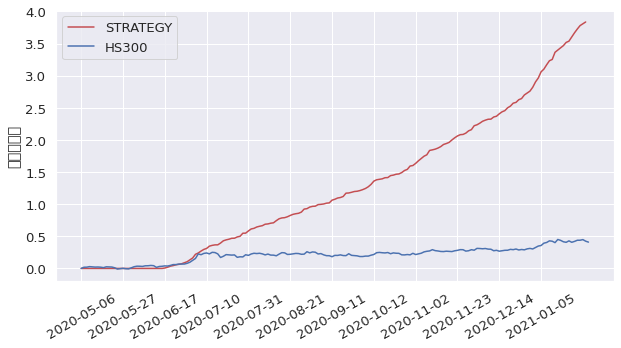

In [80]:
(result_decay,cum_return_decay) = backtest(y_re2)

In [81]:
np.mean(result_decay.turn_over)

0.44016567073470036

In [82]:
result_decay.to_csv('20190601result.csv')